# Exercise 2

## Task 1

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt

In [2]:
#a)
A = np.array([4, 2, 5, 6, 1, 6, 8, 3, 4, 9])
sd = np.std(A)
print(sd)

2.4


In [3]:
#b)
A_mean = np.mean(A)
A_median = np.median(A)
def is_skewed(A_mean,A_median):
  if A_mean > A_median:
    return "This data skewed to the right."
  elif A_mean < A_median:
    return "This data skewed to the left."
  else:
    return "This data is symmetric."

result = is_skewed(A_mean, A_median)
print(result)

This data skewed to the right.


In [5]:
#c)
quartiles = np.percentile(A, [25, 50, 75])
print("Quartiles (25%, 50%, 75%):",quartiles)

Quartiles (25%, 50%, 75%): [3.25 4.5  6.  ]


In [6]:
#d)
iqr = quartiles[2] - quartiles[0]
lower_bound = quartiles[0] - 1.5 * iqr
upper_bound = quartiles[2] + 1.5 * iqr

outliers = [x for x in A if x < lower_bound or x > upper_bound]
print("Outliers:", outliers)

Outliers: []


## Task 2

In [7]:
#a)
def pearson_cor(A,B):
  if len(A) != len(B):
    return False
  n = len(A)
  sum_A = sum(A)
  sum_B = sum(B)
  sum_A_square = sum(i ** 2 for i in A)
  sum_B_square = sum(j ** 2 for j in B)
  sum_AB = sum(i*j for i,j in zip(A,B))

  numerator = n*sum_AB - sum(A)*sum(B)
  denominator = ((n*sum_A_square-(sum_A)**2)*(n*sum_B_square-(sum_B)**2))**0.5
  r = numerator/denominator
  return r

In [11]:
#test
B = np.array([5, 7, 8, 9, 1, 6, 8, 3, 4, 9])
correlation = pearson_cor(A,B)
print(correlation)
#using package to check if the answer is correct
print(np.corrcoef(A,B)[0,1])

0.762280216158158
0.762280216158158


In [9]:
#b)
icecream = pd.read_csv("icecream.csv")
icecream.head()

,Temperature,Ice_Cream_Sales
0,14.2,215
1,16.4,325
2,11.9,185
3,15.2,332
4,18.5,406


In [10]:
icecream.isna().sum()

Temperature        0
Ice_Cream_Sales    0
dtype: int64

Accroding to the result, there is no missing value in the data.

{'whiskers': [<matplotlib.lines.Line2D at 0x7bb225caa0b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7bb225caa5f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7bb225ca9e10>],
 'medians': [<matplotlib.lines.Line2D at 0x7bb225caab30>],
 'fliers': [<matplotlib.lines.Line2D at 0x7bb225caadd0>],
 'means': []}

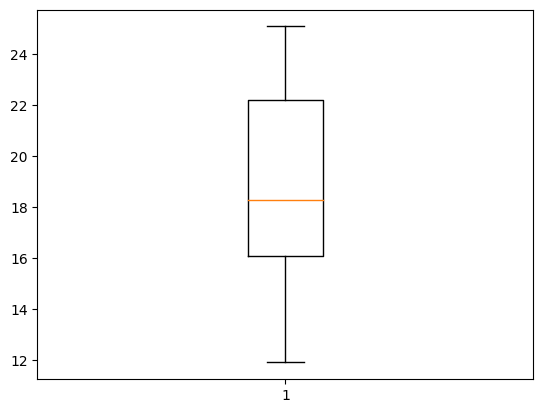

In [12]:
temp = icecream["Temperature"]
sales = icecream["Ice_Cream_Sales"]
plt.boxplot(temp)

{'whiskers': [<matplotlib.lines.Line2D at 0x7bb2259b56c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7bb2259b5ae0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7bb2259b5420>],
 'medians': [<matplotlib.lines.Line2D at 0x7bb2259b6020>],
 'fliers': [<matplotlib.lines.Line2D at 0x7bb2259b62c0>],
 'means': []}

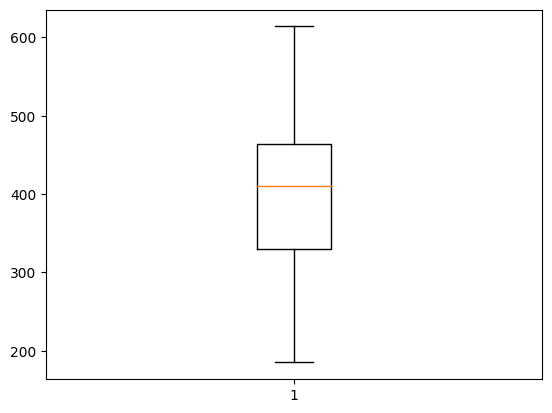

In [13]:
plt.boxplot(sales)

According to these two box plots, there are no outliers in the data.

Before calculating the correlation coefficient between two variables, we need to consider the following points:

1. Data Type: We need to make sure that both variables contain numerical data.

2. Missing values: We must check for any missing values in the data as they can lead to dimensional errors.

3. Outliers: We should be careful because outliers can severely affect the correlation coefficient.

4. Data relationship: Pearson's correlation coefficient assumes that there is a linear relationship between two variables. Therefore, before calculating the Pearson's coefficient, we can plot a scatter plot to get a preliminary idea of the relationship between the variables.

In [18]:
#c
icecream.corr()

,Temperature,Ice_Cream_Sales
Temperature,1.000000,0.957507
Ice_Cream_Sales,0.957507,1.000000


From the results we can conclude that temperature is highly positively correlated with the sales of ice cream.

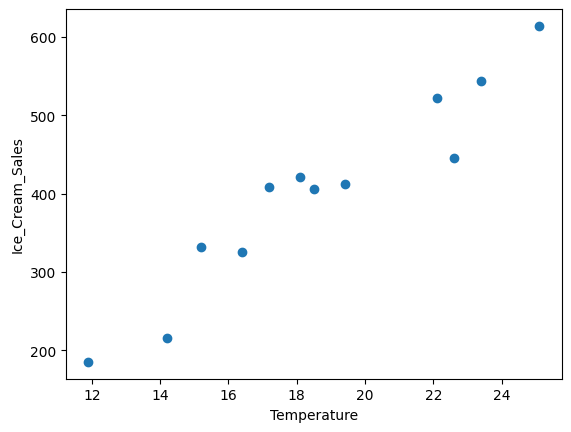

In [17]:
#d)
plt.scatter(temp,sales)
plt.xlabel("Temperature")
plt.ylabel("Ice_Cream_Sales")
plt.show()

## Task 3

\begin{align}
\text{Var}(X) &= \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2 \\
&= \frac{1}{n} \sum_{i=1}^{n} (x_i^2 - 2x_i\bar{x} + \bar{x}^2) \\
&= \frac{1}{n} \left(\sum_{i=1}^{n} x_i^2 - 2\bar{x}\sum_{i=1}^{n} x_i + \bar{x}^2 \sum_{i=1}^{n} 1\right) \\
&= \frac{1}{n} \left(\sum_{i=1}^{n} x_i^2 - 2n\bar{x}^2 + n\bar{x}^2\right) \\
&= \frac{1}{n} \left(\sum_{i=1}^{n} x_i^2 - n\bar{x}^2\right) \\
&= E(X^2) - [E(X)]^2
\end{align}
